In [2]:
%matplotlib inline
from context import spew
from scipy.optimize import curve_fit, minimize
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import scipy.ndimage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import colors as mcolors
from matplotlib.collections import PolyCollection
import pandas as pd
import scipy.stats as stats
plt.style.use('ggplot')
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)

In [3]:
param = "plume_height"
label = "H"
units = "km"
trial = 7
vals = np.linspace(10000, 40000, 21)

vals = [int(val) for val in vals]

def disp_func(col):
    return col / 1000

eruptions = dict()
samples_df = dict()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


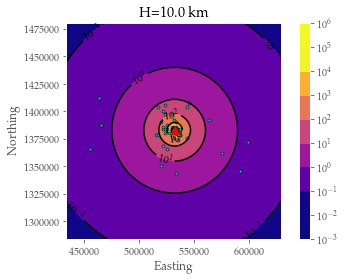

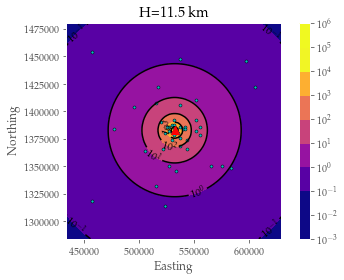

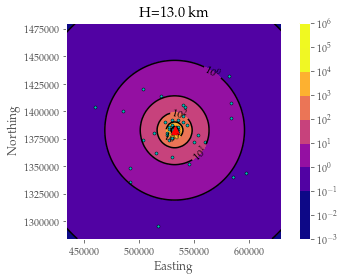

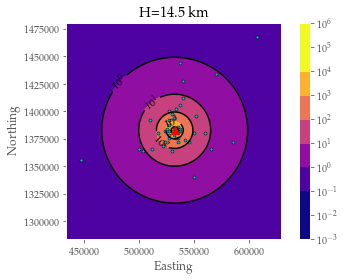

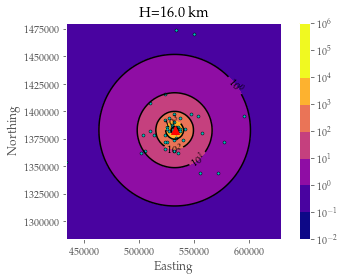

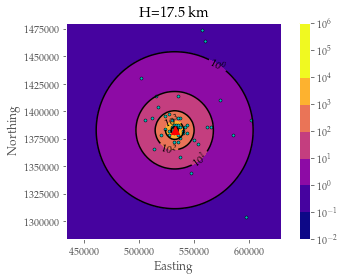

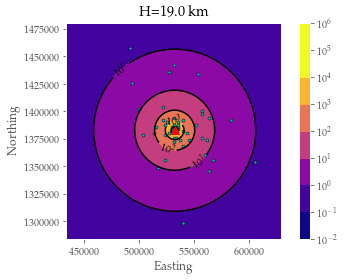

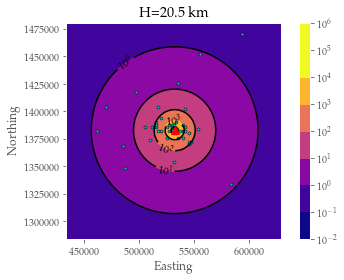

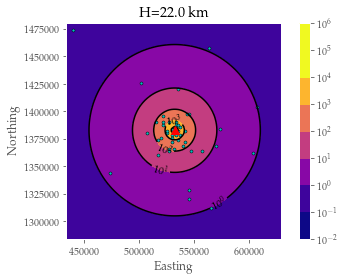

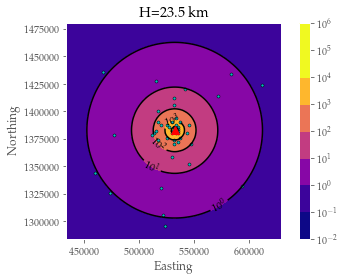

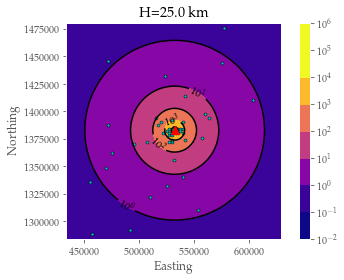

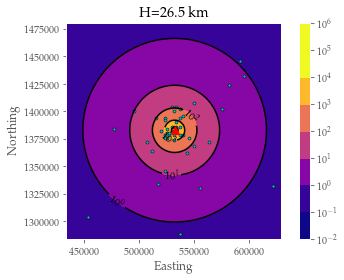

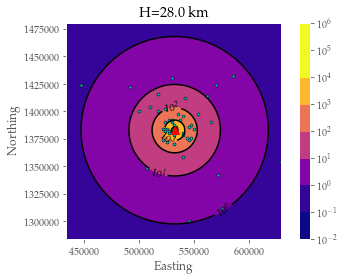

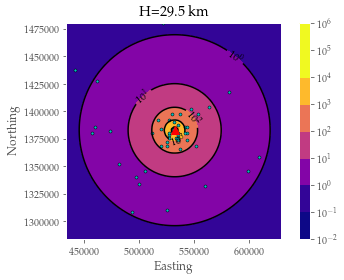

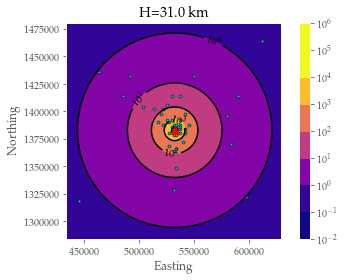

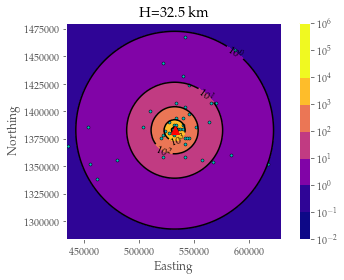

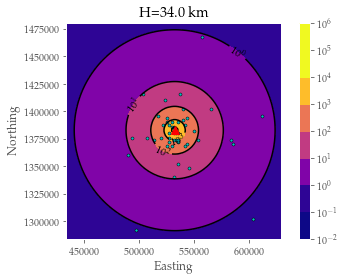

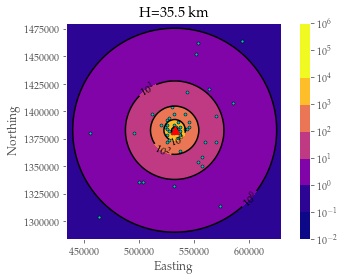

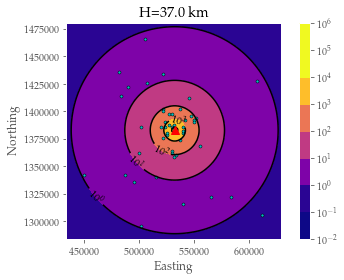

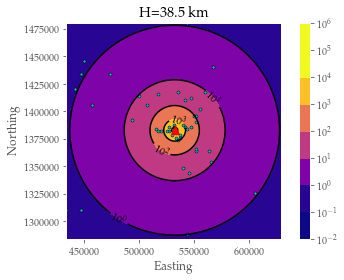

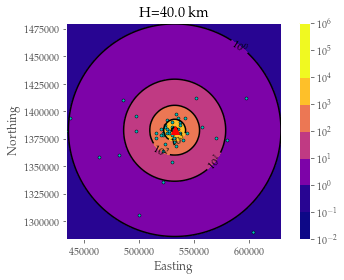

In [10]:
for v in vals:
    filename = '../data/%s_trial_%d/%s_trial_%d.txt' % (
        param, trial, param, v)
    eruptions[v] = spew.core.eruption.Eruption(data=filename, vent=Point(532290, 1382690), test=False)
    fig, ax = eruptions[v].plot_contour(background='fill', cmap="plasma", 
                                        line_colors="k", title="H=%s km"%disp_func(v))
    eruptions[v].df = eruptions[v].sample(50, alpha=0.7)
    eruptions[v].df.plot(ax=ax, c='c', marker='.', edgecolor="k")
phis = eruptions[vals[0]].phi_labels
rows = int(len(phis) / 2)

In [9]:
for v in vals:
    samples_df[v] = eruptions[v].sample(50, alpha=0.7)
    fig, ax = eruptions[v].plot_contour(background=None, cmap="plasma", 
                                        line_colors="k")
    samples_df[v].plot(ax=ax, c='c', marker='.', edgecolor="k")
    plt.show()

In [10]:
centroids = eruptions[vals[0]].phi_centroids
display(eruptions[40000].df)

,Easting,Northing,Elevation,MassArea,"[-4.5,-4.07143)","[-4.07143,-3.64286)","[-3.64286,-3.21429)","[-3.21429,-2.78571)","[-2.78571,-2.35714)","[-2.35714,-1.92857)",...,"[1.07143,1.5)","[1.5,1.92857)","[1.92857,2.35714)","[2.35714,2.78571)","[2.78571,3.21429)","[3.21429,3.64286)","[3.64286,4.07143)","[4.07143,4.5)",geometry,radius
5060,455487,1377887,0,1.997520,2.811290e-72,2.075800e-66,2.122380e-60,2.506270e-54,2.787900e-48,3.365860e-42,...,0.056563,1.737120,12.71660,29.07920,28.894800,17.127800,7.553040,2.834540,POINT (455487 1377887),76953.035145
8273,545487,1313887,0,2.671390,7.413450e-60,5.930290e-55,6.156350e-50,7.138400e-45,7.810290e-40,9.045760e-35,...,0.214892,3.450800,16.57720,29.81090,26.322900,14.825700,6.408410,2.385940,POINT (545487 1313887),70057.216745
3915,541487,1401887,0,119.946000,7.549350e-06,3.614500e-05,1.686080e-04,7.556530e-04,3.202510e-03,1.280870e-02,...,19.205600,17.491700,12.85710,7.78286,3.915010,1.677290,0.646635,0.229730,POINT (541487 1401887),21286.371649
4410,541487,1391887,0,493.109000,1.376530e-02,3.539730e-02,8.695190e-02,2.028870e-01,4.467580e-01,9.241470e-01,...,13.079400,9.749000,6.33266,3.61448,1.799120,0.753618,0.286283,0.099393,POINT (541487 1391887),13006.522133
6740,449487,1343887,0,1.181740,3.074840e-102,4.815060e-94,1.221660e-85,3.882870e-77,1.157980e-68,3.976180e-60,...,0.002104,0.307365,6.17386,24.99820,32.761600,21.837700,10.072300,3.846900,POINT (449487 1343887),91444.024507
1632,529487,1447887,0,3.340140,6.572950e-52,1.268050e-47,3.045680e-43,7.997220e-39,1.983410e-34,5.122880e-30,...,0.497404,5.268920,19.29880,29.70300,24.276900,13.217300,5.636780,2.087370,POINT (529487 1447887),65257.226558
5988,529487,1359887,0,94.974900,1.000690e-06,5.637000e-06,3.109270e-05,1.652310e-04,8.305480e-04,3.946320e-03,...,19.601400,18.784800,14.26300,8.78521,4.453550,1.920580,0.742696,0.263879,POINT (529487 1359887),22974.629877
2824,537487,1423887,0,14.385300,4.664920e-21,3.551110e-19,2.861520e-17,2.316220e-15,1.775220e-13,1.326530e-11,...,9.556280,19.978700,25.24210,20.88740,12.413500,5.843810,2.348040,0.848510,POINT (537487 1423887),41523.506812
3454,609487,1411887,0,1.614790,3.401870e-83,1.771840e-76,1.352930e-69,1.228800e-62,1.049630e-55,9.943280e-49,...,0.017253,0.935017,9.88770,27.85340,30.631800,18.960900,8.502170,3.211750,POINT (609487 1411887),82533.881637
4717,561487,1385887,0,44.208900,1.066490e-10,1.245020e-09,1.454900e-08,1.657730e-07,1.787790e-06,1.837350e-05,...,18.368200,21.982800,19.26470,12.86040,6.796820,3.012340,1.179320,0.421476,POINT (561487 1385887),29371.510312


In [23]:
def coef_def(y, y_fit):
    # residual sum of squares
    ss_res = np.sum((y - y_fit) ** 2)

    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)

    return r2

In [ ]:
def log_gamma_kernel(x, a, b, c):
    return np.log(c) + (a*np.log(x)) + (b * x)

def gamma_kernel(x, a, b, c):
    return c*(x**a)*np.exp(b*x)


def w_lgk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2))

def w_gk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(y_data - (gamma_kernel(x_data, *k))) ** 2))

def uw_lgk_sse(k, x_data, y_data):
    return sum((np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2)

def uw_gk_sse(k, x_data, y_data):
    return sum((y_data - (gamma_kernel(x_data, *k))) ** 2)

def constraint1(k):
    return k[0] - 0.00001

def constraint2(k):
    return -1e-7 - k[1]


w_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])
uw_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])


for k, phi in enumerate(phis):
#     fig, axs = plt.subplots(rows, 2, figsize=(
#         20, 15), facecolor='w', edgecolor='k')
#     axs = axs.ravel()
    for i, (h, erp) in enumerate(eruptions.items()):
        new_df = erp.df
        ma = new_df['MassArea'].values
        wt = new_df[phi].values
        xx = new_df['radius'].values
        yy = ma * (wt / 100)

        pnts = list(set(zip(xx, yy)))
        pnts = sorted(pnts, key=lambda x: x[0])

#         x = np.array([p[0] for p in pnts], dtype=np.float64)
#         y = np.array([p[1] for p in pnts], dtype=np.float64)

#         tot_mass = np.trapz(y, x=x)
#         idx = 0
#         perc = 0.0
#         while perc < 99.999:
#             mass = np.trapz(y[:idx], x=x[:idx])
#             idx += 1
#             perc = (mass / tot_mass) * 100

#         x_data = x[:idx]
#         y_data = y[:idx]
        x_data = xx
        y_data = yy

        k0 = np.array([1, -1e-3, 100], dtype=np.float64)

        def w_gk_fun(k): return w_gk_sse(k, x_data, y_data)
        
        def uw_gk_fun(k): return uw_gk_sse(k, x_data, y_data)
        
        
#         w_gk_bounds = [(0, None),(None, -1e-7), (None, None)]
#         uw_gk_bounds = [(0, None),(None, -1e-7), (None, None)]

#         w_gk_bounds = [(0, None),(None, 0), (None, None)]
#         uw_gk_bounds = [(0, None),(None, 0), (None, None)]

        con1 = {'type':'ineq', 'fun':constraint1}
        con2 = {'type':'ineq', 'fun':constraint2}
        cons = [con1, con2]
        print("got here")
        w_gk_popt = minimize(w_gk_fun, k0, method='COBYLA', constraints=[con1])
        uw_gk_popt = minimize(uw_gk_fun, k0, method='COBYLA', constraints=[con1])
        
        w_gk_res = coef_def(y_data, gamma_kernel(x_data, *w_gk_popt.x))
        uw_gk_res = coef_def(y_data, gamma_kernel(x_data, *uw_gk_popt.x))
        print("_______Phi:" + str(phi) + " __ H:" + str(h) + "______")
        print("Weighted Gamma Kernel: " + str(w_gk_popt.success) + " : " + str(w_gk_popt.message))
        print("w_gk_params:" + str(w_gk_popt.x))
        print("w_gk_res:" + str(w_gk_res))
        print("Unweighted Gamma Kernel: " + str(uw_gk_popt.success) + " : " + str(uw_gk_popt.message))
        print("uw_gk_params:" + str(uw_gk_popt.x))
        print("uw_gk_res:" + str(uw_gk_res))

        xf = np.linspace(0, x_data.max(), 100)
        w_gk_yf = gamma_kernel(xf, *w_gk_popt.x)
        uw_gk_yf = gamma_kernel(xf, *uw_gk_popt.x)

#         if (phi in phis[-2:] and h in vals[::2]):
        fig, ax1 = plt.subplots(1, 1, figsize=(4, 3))

        ax1.scatter(x_data, y_data, s=30)
        ax1.plot(xf, w_gk_yf, 'g-', lw=1.2, label="Weighted GK")
        ax1.plot(xf, uw_gk_yf, 'c-', lw=1.2, label="Unweighted GK")
#         ax2.scatter(np.log(x_data), np.log(y_data), s=30)
#         ax2.plot(np.log(xf), w_lgk_yf, 'b-', lw=1.2, label="w lgk")
#         ax2.plot(np.log(xf), np.log(w_gk_yf), 'g-', lw=1.2, label="w gk")
#         ax2.plot(np.log(xf), uw_lgk_yf, 'm-', lw=1.2, label="uw lgk")
#         ax2.plot(np.log(xf), np.log(uw_gk_yf), 'c-', lw=1.2, label="uw gk")
        plt.legend()
        ax1.set_ylabel('Mass/Area')
        ax1.set_xlabel(r'Radius')
        plt.title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(h)), fontsize=14)
        w_gk_df = w_gk_df.append(
            {'H': h, 'Phi': phi, 'a': w_gk_popt.x[0], 'b': w_gk_popt.x[1], 'c': w_gk_popt.x[2], 'res': w_gk_res, 'data': (x_data, y_data)}, ignore_index=True)
        uw_gk_df = uw_gk_df.append(
            {'H': h, 'Phi': phi, 'a': uw_gk_popt.x[0], 'b': uw_gk_popt.x[1], 'c': uw_gk_popt.x[2],'res': uw_gk_res, 'data': (x_data, y_data)}, ignore_index=True)
        plt.tight_layout()
#         plt.savefig("../data/%s_trial_%d/phi%s_H%skm.png" %
#                 (param, trial, phi, disp_func(h)), dpi=200, format='png')
        plt.show()
display(w_gk_df)
display(uw_gk_df)

Weighted Gamma Kernel


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


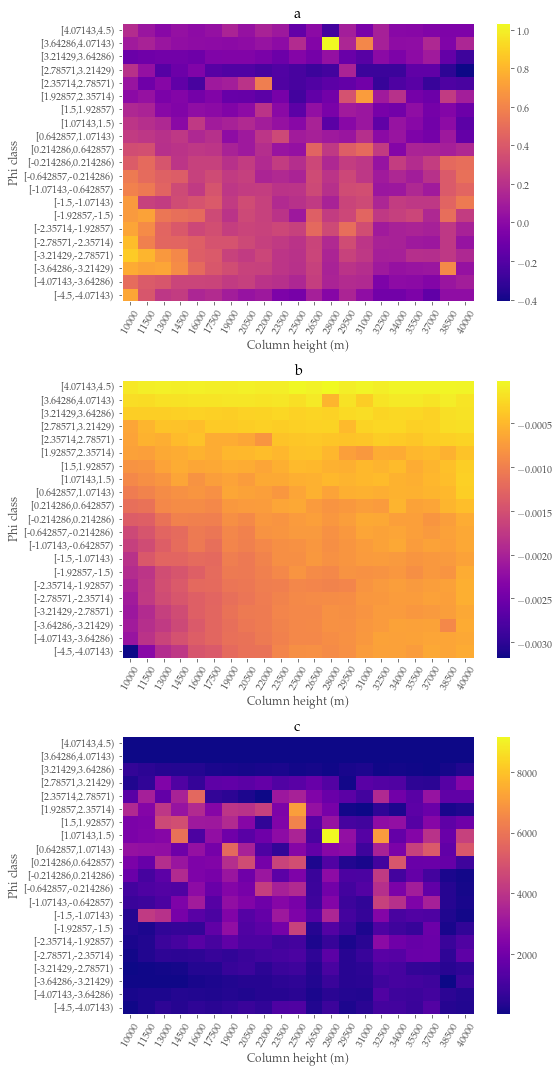

Unweighted Gamma Kernel


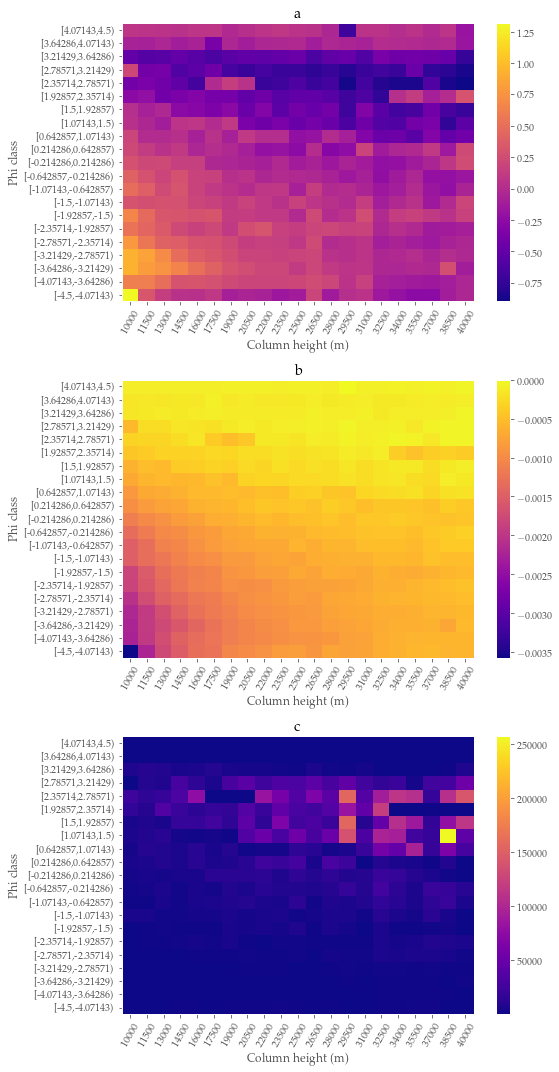

In [18]:
for df, tit in zip([w_gk_df, uw_gk_df], ["Weighted Gamma Kernel", "Unweighted Gamma Kernel"]):
    a_piv = df.pivot_table(index='Phi', columns='H', values='a')
    b_piv = df.pivot_table(index='Phi', columns='H', values='b')
    c_piv = df.pivot_table(index='Phi', columns='H', values='c')
    a_piv = a_piv.reindex(phis)
    b_piv = b_piv.reindex(phis)
    c_piv = c_piv.reindex(phis)

    print(tit)
    fig, axs = plt.subplots(3, 1, figsize=(
        8, 15), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i, piv, p in zip([0, 1, 2], [a_piv, b_piv, c_piv], ['a', 'b', 'c']):
        c = axs[i].pcolor(piv.values, cmap='plasma')
        # cont = axs[i].contour(scipy.ndimage.zoom(piv.values, 3), colors='w')
        axs[i].set_yticks(np.arange(0.5, len(piv.index), 1))
        axs[i].set_yticklabels(piv.index)
        axs[i].set_xticks(np.arange(0.5, len(piv.columns), 1))
        axs[i].set_xticklabels(piv.columns, rotation=60)
        fig.colorbar(c, ax=axs[i])
        axs[i].grid(False)
        axs[i].set_title(p)
        # axs[i].clabel(cont, inline=1, fontsize=10)
        axs[i].set_xlabel("Column height (m)")
        axs[i].set_ylabel("Phi class")
    # plt.locator_params(nbins=7)
    plt.tight_layout()
    plt.savefig("param_maps_cont_weights%s.png" % tit, format='png')
    plt.show()

Weighted Gamma Kernel
Unweighted Gamma Kernel


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


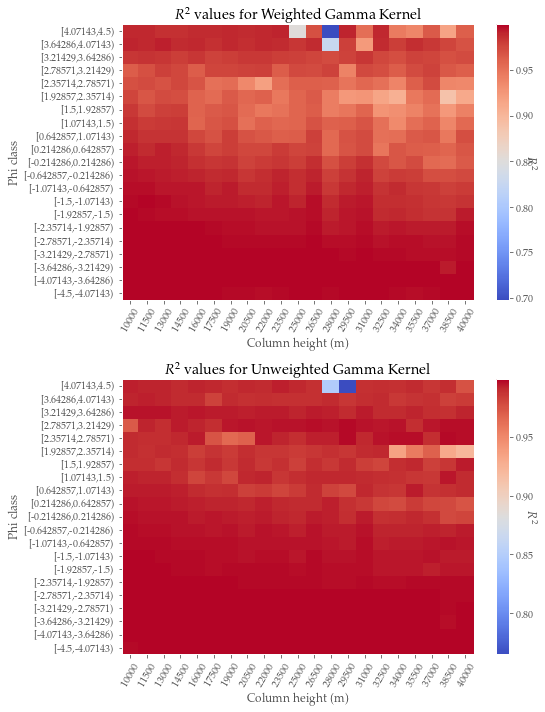

In [19]:

fig, axs = plt.subplots(2, 1, figsize=(
    8, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()
for df, tit, i in zip([w_gk_df, uw_gk_df], ["Weighted Gamma Kernel", "Unweighted Gamma Kernel"], [0,1]):
    print(tit)
    c = axs[i].pcolor(df["res"].values.reshape(21,21), cmap='coolwarm')
    # cont = axs[i].contour(scipy.ndimage.zoom(piv.values, 3), colors='w')
    axs[i].set_yticks(np.arange(0.5, len(piv.index), 1))
    axs[i].set_yticklabels(piv.index)
    axs[i].set_xticks(np.arange(0.5, len(piv.columns), 1))
    axs[i].set_xticklabels(piv.columns, rotation=60)
    cbar = fig.colorbar(c, ax=axs[i])
    cbar.ax.set_ylabel("$R^2$", rotation=270)
    axs[i].grid(False)
    axs[i].set_title("$R^2$ values for %s"%tit)
    axs[i].set_xlabel("Column height (m)")
    axs[i].set_ylabel("Phi class")
    # plt.locator_params(nbins=7)
plt.tight_layout()
plt.savefig("param_maps_cont_res.png", format='png')
plt.show()

In [ ]:
def log_gamma_kernel(x, a, b, c):
    return np.log(c) + (a*np.log(x)) + (b * x)

def gamma_kernel(x, a, b, c):
    return c*(x**a)*np.exp(b*x)


def w_lgk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2))

def w_gk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(y_data - (gamma_kernel(x_data, *k))) ** 2))

def uw_lgk_sse(k, x_data, y_data):
    return sum((np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2)

def uw_gk_sse(k, x_data, y_data):
    return sum((y_data - (gamma_kernel(x_data, *k))) ** 2)


w_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])
w_lgk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])
uw_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])
uw_lgk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])




for k, phi in enumerate(phis):
#     fig, axs = plt.subplots(rows, 2, figsize=(
#         20, 15), facecolor='w', edgecolor='k')
#     axs = axs.ravel()
    for i, (h, erp) in enumerate(eruptions.items()):
        new_df = erp.df
        ma = new_df['MassArea'].values
        wt = new_df[phi].values
        xx = new_df['radius'].values**2
        yy = ma * (wt / 100)

        pnts = list(set(zip(xx, yy)))
        pnts = sorted(pnts, key=lambda x: x[0])

        x = np.array([p[0] for p in pnts], dtype=np.float64)
        y = np.array([p[1] for p in pnts], dtype=np.float64)

        tot_mass = np.trapz(y, x=x)
        idx = 0
        perc = 0.0
        while perc < 99.999:
            mass = np.trapz(y[:idx], x=x[:idx])
            idx += 1
            perc = (mass / tot_mass) * 100

        x_data = x[:idx]
        y_data = y[:idx]
#         x_data = x
#         y_data = y

        k0 = np.array([1, -1e-3, 1], dtype=np.float64)

        def w_gk_fun(k): return w_gk_sse(k, x_data, y_data)
        
        def w_lgk_fun(k): return w_lgk_sse(k, x_data, y_data)
        
        def uw_gk_fun(k): return uw_gk_sse(k, x_data, y_data)
        
#         def uw_lgk_fun(k): return uw_lgk_sse(k, x_data, y_data)
        
        w_gk_bounds = [(None, None),(None, -1e-7), (None, None)]
        w_lgk_bounds = [(None, None),(None, -1e-7), (None, None)]
        uw_gk_bounds = [(None, None),(None, -1e-7), (None, None)]
#         uw_lgk_bounds = [(None, None),(None, -1e-7), (None, None)]
        
        w_gk_popt = minimize(w_gk_fun, k0, bounds=w_gk_bounds, method='Nelder-Mead')
        w_lgk_popt = minimize(w_lgk_fun, k0, bounds=w_lgk_bounds, method='Nelder-Mead')
        uw_gk_popt = minimize(uw_gk_fun, k0, bounds=uw_gk_bounds, method='Nelder-Mead')
        
        w_gk_res = coef_def(y_data, gamma_kernel(x_data, *w_gk_popt.x))
        w_lgk_res = coef_def(y_data, log_gamma_kernel(x_data, *w_lgk_popt.x))
        uw_gk_res = coef_def(y_data, gamma_kernel(x_data, *uw_gk_popt.x))
        
#         uw_lgk_popt = minimize(uw_lgk_fun, k0, bounds=uw_lgk_bounds, method='Nelder-Mead')
        print("_______Phi:" + str(phi) + " __ H:" + str(h) + "______")
        print("Weighted Gamma Kernel: " + str(w_gk_popt.success) + " : " + str(w_gk_popt.message))
        print("w_gk_params:" + str(w_gk_popt.x))
        print("w_gk_res:" + str(w_gk_res))
        print("Weighted Log Gamma Kernel: " + str(w_lgk_popt.success) + " : " + str(w_lgk_popt.message))
        print("w_lgk_params:" + str(w_lgk_popt.x))
        print("w_lgk_res:" + str(w_lgk_res))
        print("Unweighted Gamma Kernel: " + str(uw_gk_popt.success) + " : " + str(uw_gk_popt.message))
        print("uw_gk_params:" + str(uw_gk_popt.x))
        print("uw_gk_res:" + str(uw_gk_res))
#         print("Unweighted Log Gamma Kernel: " + str(uw_lgk_popt.success) + " : " + str(uw_lgk_popt.message))
#         print("uw_lgk_params:" + str(uw_lgk_popt.x))
        
        xf = np.linspace(0, x_data.max(), 100)
        w_gk_yf = gamma_kernel(xf, *w_gk_popt.x)
        w_lgk_yf = log_gamma_kernel(xf, *w_lgk_popt.x)
        uw_gk_yf = gamma_kernel(xf, *uw_gk_popt.x)
#         uw_lgk_yf = log_gamma_kernel(xf, *uw_lgk_popt.x)

#         if (phi in phis[-2:] and h in vals[::2]):
        fig, ax1 = plt.subplots(1, 1, figsize=(4, 3))

        ax1.scatter(x_data, y_data, s=30)
        ax1.plot(xf, np.exp(w_lgk_yf), 'b-', lw=1.2, label="Weighted LGK")
        ax1.plot(xf, w_gk_yf, 'g-', lw=1.2, label="Weighted GK")
#         ax1.plot(xf, np.exp(uw_lgk_yf), 'm-', lw=1.2, label="Unweighted LGK")
        ax1.plot(xf, uw_gk_yf, 'c-', lw=1.2, label="Unweighted GK")
#         ax2.scatter(np.log(x_data), np.log(y_data), s=30)
#         ax2.plot(np.log(xf), w_lgk_yf, 'b-', lw=1.2, label="w lgk")
#         ax2.plot(np.log(xf), np.log(w_gk_yf), 'g-', lw=1.2, label="w gk")
#         ax2.plot(np.log(xf), uw_lgk_yf, 'm-', lw=1.2, label="uw lgk")
#         ax2.plot(np.log(xf), np.log(uw_gk_yf), 'c-', lw=1.2, label="uw gk")
        plt.legend()
        ax1.set_ylabel('Mass/Area')
        ax1.set_xlabel(r'Radius')
        plt.title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(h)), fontsize=14)
        w_gk_df = w_gk_df.append(
            {'H': h, 'Phi': phi, 'a': w_gk_popt.x[0], 'b': w_gk_popt.x[1], 'c': w_gk_popt.x[2], 'res': w_gk_res, 'data': (x_data, y_data)}, ignore_index=True)
        w_lgk_df = w_lgk_df.append(
            {'H': h, 'Phi': phi, 'a': w_lgk_popt.x[0], 'b': w_lgk_popt.x[1], 'c': w_lgk_popt.x[2], 'res': w_lgk_res, 'data': (x_data, y_data)}, ignore_index=True)
        uw_gk_df = uw_gk_df.append(
            {'H': h, 'Phi': phi, 'a': uw_gk_popt.x[0], 'b': uw_gk_popt.x[1], 'c': uw_gk_popt.x[2], 'res': uw_gk_res, 'data': (x_data, y_data)}, ignore_index=True)
#         uw_lgk_df = uw_lgk_df.append(
#             {'H': h, 'Phi': phi, 'a': uw_lgk_popt.x[0], 'b': uw_lgk_popt.x[1], 'c': uw_lgk_popt.x[2], 'data': (x_data, y_data)}, ignore_index=True)
        plt.tight_layout()
#         plt.savefig("../data/%s_trial_%d/phi%s_H%skm.png" %
#                 (param, trial, phi, disp_func(h)), dpi=200, format='png')
        plt.show()
display(w_gk_df)
display(w_lgk_df)
display(uw_gk_df)
# display(uw_lgk_df)